# 基于上证指数行情数据的基本分布分析
> v0.1
> 
> 20160416
> 
> 主要是涨幅和价格的分析

导入模块

In [13]:
import tushare as ts
import pylab
import pandas as pd
import numpy as np
%matplotlib inline
code1='sh'
code2='000001'

### 获得基础信息

In [14]:
ind=ts.get_index()
ind

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,-0.14,3085.0263,3082.3615,3078.1166,3089.9509,3066.8721,189613051,2241.4131
1,000002,Ａ股指数,-0.14,3228.6035,3225.7934,3221.3384,3233.7606,3209.5441,189178839,2238.0301
2,000003,Ｂ股指数,-0.05,380.9272,381.1852,381.0027,381.5961,379.9657,434212,3.3830
3,000008,综合指数,0.04,2693.2656,2688.5351,2689.5274,2699.8432,2681.0737,43515701,516.3842
4,000009,上证380,-0.15,5613.1737,5612.3777,5603.6921,5624.9310,5570.4479,56640919,692.3881
5,000010,上证180,0.03,7048.5325,7037.3724,7039.3256,7063.9444,7011.4783,67573173,711.8506
6,000011,基金指数,0.00,5693.8953,5691.5488,5691.7921,5696.3754,5686.8564,13412574,388.4134
7,000012,国债指数,0.01,156.7609,156.7466,156.7556,156.7624,156.7342,281783,2.9885
8,000016,上证50,0.15,2182.1142,2178.8677,2182.0667,2190.7302,2172.9695,23818860,252.2315
9,000017,新综指,-0.14,2603.5386,2601.2726,2597.6936,2607.6979,2588.1789,189088293,2236.8938


### 获得近三年的日线数据

In [15]:
dp=ts.get_hist_data(code1)
dp[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-04-15,3085.03,3089.95,3078.12,3066.87,1896130.50,-4.24,-0.14,3056.946,3039.130,3009.859,2221182.22,2214953.51,2297946.85
2016-04-14,3080.09,3086.70,3082.36,3056.99,2082378.25,15.72,0.51,3038.314,3031.710,3001.195,2217765.40,2245753.91,2303285.43
2016-04-13,3041.36,3097.16,3066.64,3041.36,3100032.50,42.99,1.42,3023.526,3023.538,2990.598,2243128.75,2247887.54,2292412.79
2016-04-12,3031.30,3036.82,3023.65,3001.32,1827186.62,-10.31,-0.34,3020.316,3008.857,2980.485,2087646.35,2120849.64,2219104.49
2016-04-11,3006.91,3048.98,3033.96,3006.91,2200183.25,49.00,1.64,3026.200,3002.274,2972.277,2235669.73,2140152.21,2225153.17


### 获得涨幅数据列，并绘制涨幅分布图

最小值： -8.49
最大值： 5.76
平均值： 0.0627260273973
标准差： 1.7978145837


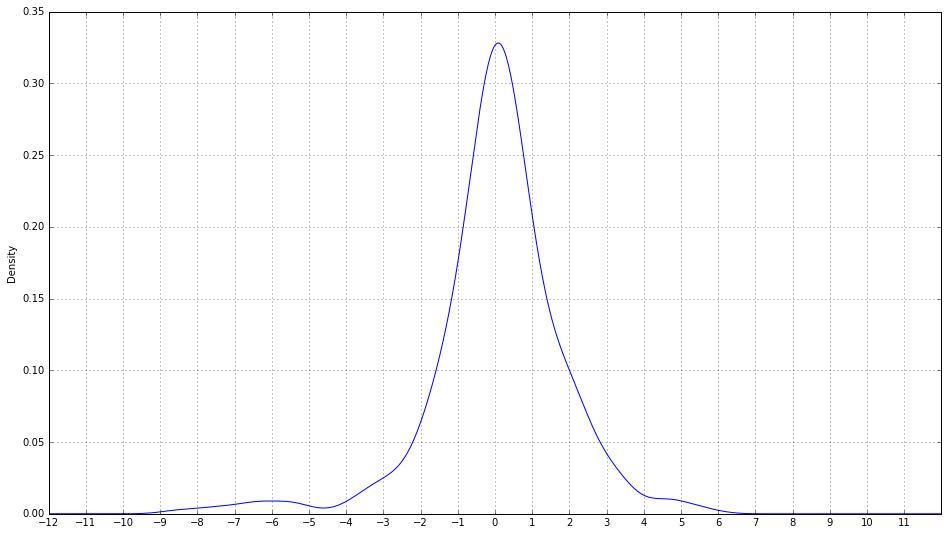

In [16]:
pc=dp.p_change
pxt=np.arange(-12,12,1)
pxl=[-12,12]
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc.min()
print '最大值：',pc.max()
print '平均值：',pc.mean()
print '标准差：',pc.std()

-  

-  

### 近20日的涨幅数据及分布图

最小值： -1.63
最大值： 2.77
平均值： 0.2975
标准差： 1.23585842742


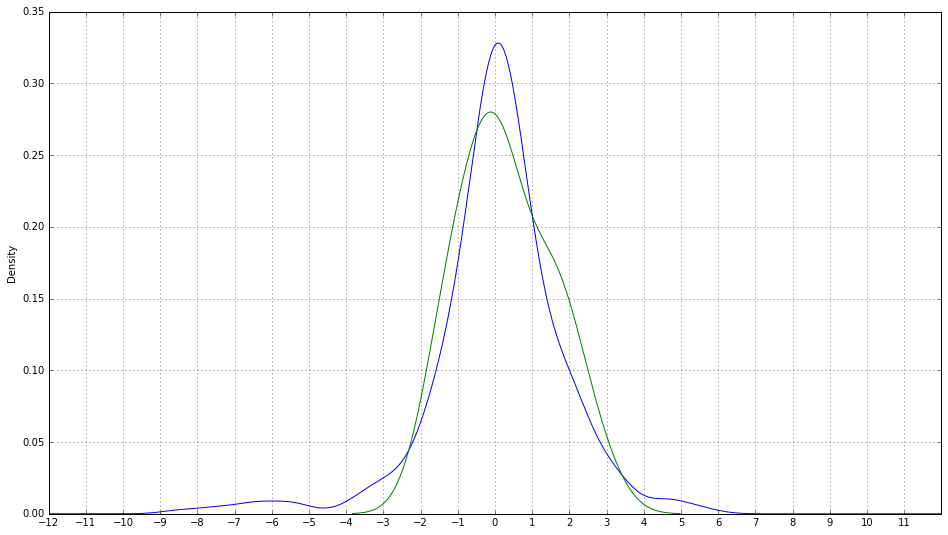

In [17]:
pc20=dp[:20].p_change
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
pc20.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc20.min()
print '最大值：',pc20.max()
print '平均值：',pc20.mean()
print '标准差：',pc20.std()

- 根据月内数据与三年数据的比较，判断近期行情的重心

### 分析三年数据的收盘价分布情况

最小值： 1950.013
最大值： 5166.35
平均值： 2777.46255753
标准差： 786.56589514


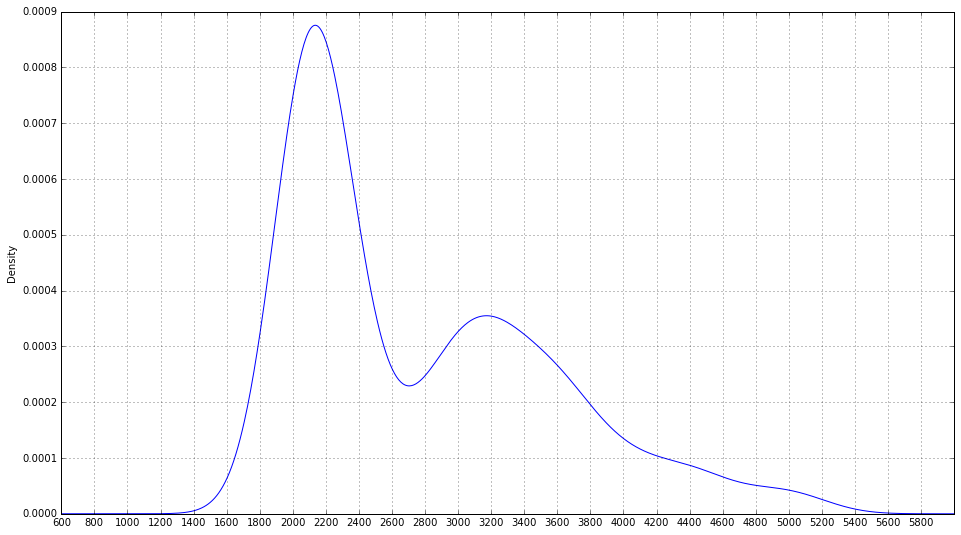

In [24]:
close=dp.close
cxt=np.arange(600,6000,200)
cxl=[600,6000]
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close.min()
print '最大值：',close.max()
print '平均值：',close.mean()
print '标准差：',close.std()

- 此图基本反应了 

 - 

 -  

近20日收盘价分布情况对比

最小值： 2919.83
最大值： 3082.36
平均值： 3009.859
标准差： 43.2205414004


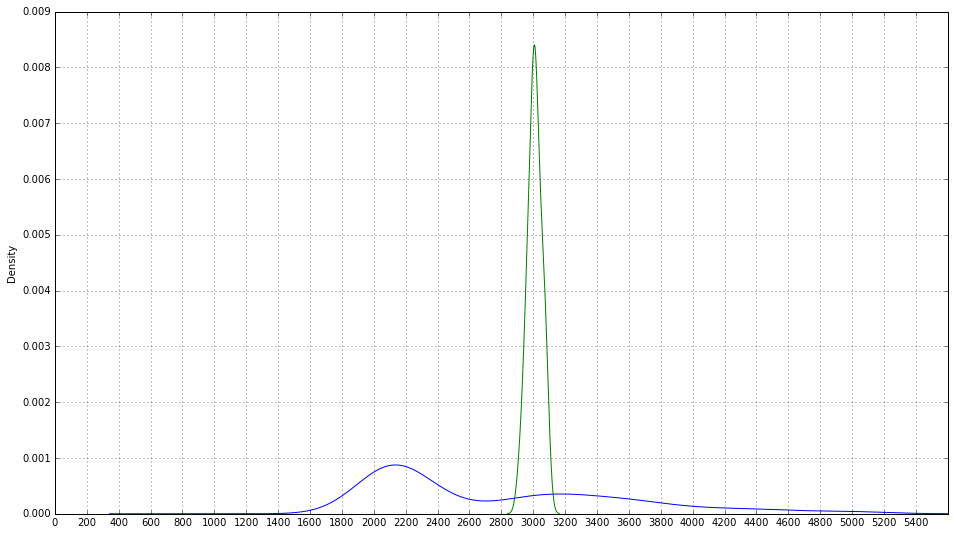

In [19]:
close20=dp[:20].close
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
close20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close20.min()
print '最大值：',close20.max()
print '平均值：',close20.mean()
print '标准差：',close20.std()

近20日的收盘价数据与三年数据的对比，判断目前价格位置

### 对全部数据的收盘价分析

#### 获取全部数据（从2000年1月1日起）

In [21]:
df=ts.get_h_data(code2,start='2000-01-01',index=1) 
df[:5]

[Getting data:]#################################################################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-15,3085.026,3089.951,3078.117,3066.872,18961305100,224141313373
2016-04-14,3080.090,3086.698,3082.362,3056.989,20823783000,235056056274
2016-04-13,3041.358,3097.165,3066.638,3041.358,31000324600,331420683224
2016-04-12,3031.301,3036.825,3023.646,3001.315,18271866800,207079807862
2016-04-11,3006.909,3048.977,3033.957,3006.909,22001832400,252328393482


简单分析

In [22]:
df.describe()

,open,high,close,low,volume,amount
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03,3.940000e+03
mean,2327.436616,2350.633138,2329.386344,2302.487715,8.953960e+09,9.652823e+10
std,926.098928,940.142237,927.042352,909.040942,1.138364e+10,1.466821e+11
min,1007.901000,1019.922000,1011.499000,998.228000,2.497117e+08,2.659838e+09
25%,1636.636750,1650.014500,1635.417250,1619.684000,1.395043e+09,1.083111e+10
50%,2127.039500,2138.344500,2127.195000,2109.178000,6.064934e+09,5.782025e+10
75%,2831.056000,2864.322500,2835.600500,2791.818500,1.135084e+10,1.169853e+11
max,6057.428000,6124.044000,6092.057000,6040.713000,8.571328e+10,1.309925e+12


收盘价分析

最小值： 1011.499
最大值： 6092.057
平均值： 2329.38634416
标准差： 927.042351624


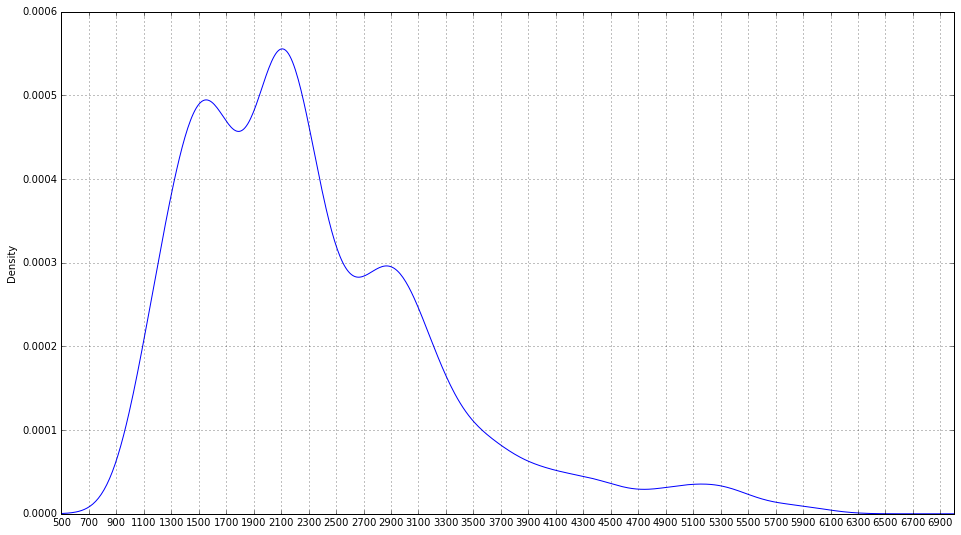

In [28]:
closeall=df.close
nxt=np.arange(500,7000,200)
nxl=[500,7000]
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)
print '最小值：',closeall.min()
print '最大值：',closeall.max()
print '平均值：',closeall.mean()
print '标准差：',closeall.std()

- 除权数据的分析中，价格范围相比三年数据扩大不多。特点为：

 -  
 
 -  
 
  -  

与20日收盘价对比

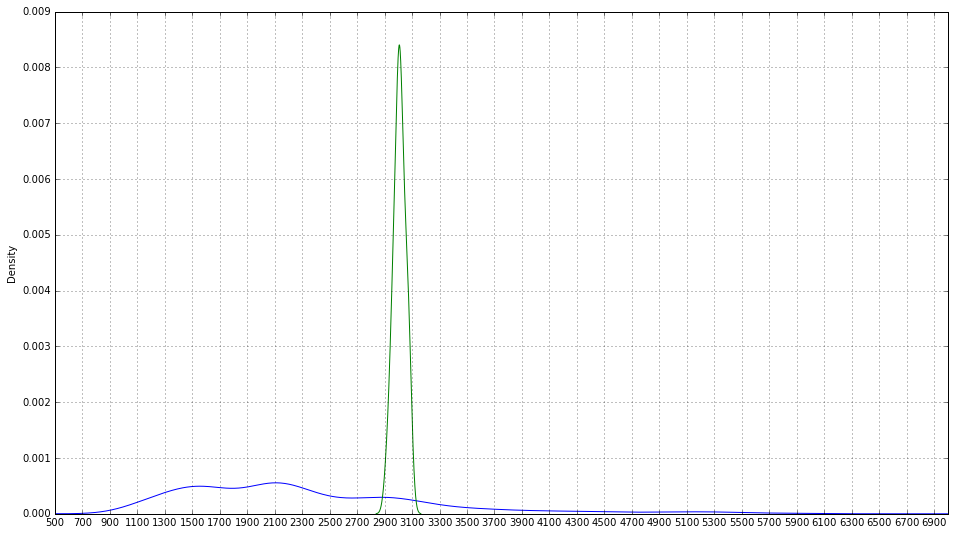

In [29]:
closeall20=df[:20].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

*三个月多阶段对比*

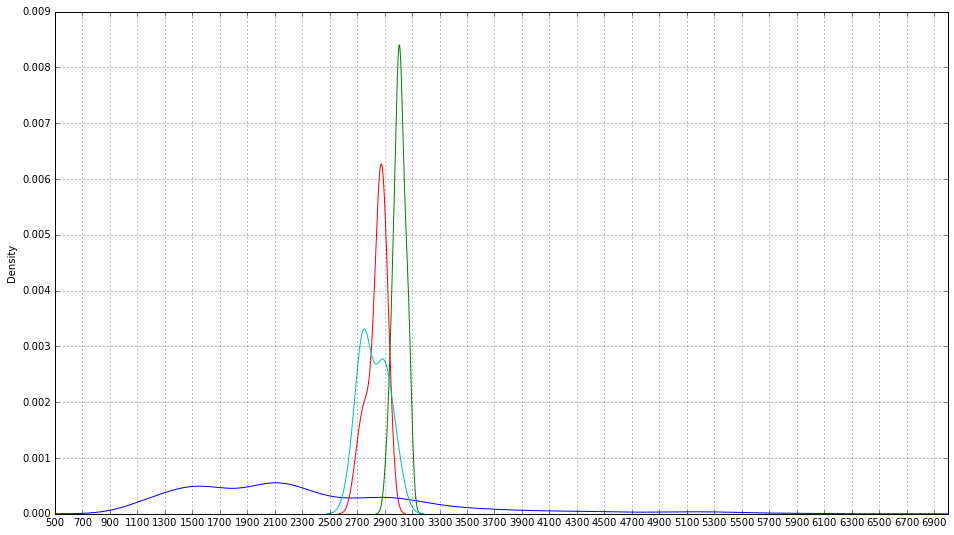

In [30]:
closeall40=df[20:40].close
closeall60=df[40:60].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9))
closeall40.plot(kind='kde',grid=True,figsize=(16,9))
closeall60.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

In [31]:
closeall20.describe()

count      20.000000
mean     3009.858800
std        43.219668
min      2919.832000
25%      2983.577000
50%      3008.975000
75%      3038.115750
max      3082.362000
Name: close, dtype: float64

In [32]:
closeall40.describe()

count      20.00000
mean     2845.40290
std        67.41389
min      2687.97900
25%      2808.91175
50%      2861.28850
75%      2898.35175
max      2928.89600
Name: close, dtype: float64

In [33]:
closeall60.describe()

count      20.000000
mean     2822.429350
std       100.295244
min      2655.661000
25%      2744.458750
50%      2808.797000
75%      2904.186750
max      3007.739000
Name: close, dtype: float64

### 三年数据和全部数据的基本统计对比

- 三年数据：

In [34]:
dp.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,7.300000e+02,7.300000e+02
mean,2772.383953,2804.106675,2777.462558,2741.592184,2.424732e+06,1.209259,0.062726,2775.076079,2772.259974,2766.802527,2.420759e+06,2.416141e+06,2.407155e+06
std,785.139201,803.098915,786.565895,762.650804,1.745388e+06,62.116368,1.797815,784.901057,782.951559,778.545348,1.699502e+06,1.675838e+06,1.648553e+06
min,1935.516000,1959.158000,1950.013000,1849.653000,5.627125e+05,-345.350000,-8.490000,1960.691000,1980.786000,2002.162000,6.472277e+05,6.787720e+05,6.831418e+05
25%,2103.431250,2114.841250,2104.018750,2093.081500,1.045133e+06,-16.153500,-0.620000,2104.130250,2101.001000,2096.284750,1.065429e+06,1.064159e+06,1.041005e+06
50%,2359.681500,2370.835000,2361.672500,2345.476000,1.831604e+06,2.937500,0.120000,2358.439000,2350.050000,2345.910000,1.878706e+06,1.906168e+06,1.894522e+06
75%,3295.695750,3344.277500,3309.161750,3274.698500,3.275705e+06,22.562750,0.880000,3296.950000,3291.161250,3290.606750,3.244233e+06,3.303041e+06,3.347520e+06
max,5174.418000,5178.191000,5166.350000,5103.401000,8.571328e+06,224.190000,5.760000,5127.879000,5052.792000,4925.927000,7.287152e+06,6.936106e+06,6.499393e+06


- 全部前复权数据：

In [35]:
df.describe()

,open,high,close,low,volume,amount
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03,3.940000e+03
mean,2327.436616,2350.633138,2329.386344,2302.487715,8.953960e+09,9.652823e+10
std,926.098928,940.142237,927.042352,909.040942,1.138364e+10,1.466821e+11
min,1007.901000,1019.922000,1011.499000,998.228000,2.497117e+08,2.659838e+09
25%,1636.636750,1650.014500,1635.417250,1619.684000,1.395043e+09,1.083111e+10
50%,2127.039500,2138.344500,2127.195000,2109.178000,6.064934e+09,5.782025e+10
75%,2831.056000,2864.322500,2835.600500,2791.818500,1.135084e+10,1.169853e+11
max,6057.428000,6124.044000,6092.057000,6040.713000,8.571328e+10,1.309925e+12
